In [1]:
import time
import csv
from datetime import datetime
import numpy as np

def extract_data(filename):
    file = open(filename, 'r', encoding='utf-8-sig')
    csvreader = csv.reader(file)
    stamp_list = []
    for i in csvreader:
        stamp_list.append(i)

    mx_stamps = []
    sys_stamps = []
    pleth = []

    print(stamp_list[0])

    for j in range(len(stamp_list)):
        # print(stamp_list[j])
        time_obj_mx = datetime.strptime(stamp_list[j][0], '%d-%m-%Y %H:%M:%S.%f')
        # stamp_mx = 60*time_obj_mx.minute + time_obj_mx.second + time_obj_mx.microsecond / 1e6
        stamp_mx = time_obj_mx.timestamp()
        mx_stamps.append(stamp_mx)

        time_obj_sys = datetime.strptime(stamp_list[j][2], '%d-%m-%Y %H:%M:%S.%f')
        # stamp_sys = 60*time_obj_sys.minute + time_obj_sys.second + time_obj_sys.microsecond / 1e6
        stamp_sys = time_obj_sys.timestamp()
        sys_stamps.append(stamp_sys)

        pleth.append(int(stamp_list[j][3]))

        # print(stamp_mx, stamp_sys)

    return mx_stamps, sys_stamps, pleth


def find_deltas(sys_stamps, mx_stamps):
    const_num = sys_stamps[0]
    deltas = []
    for i, stamp in enumerate(sys_stamps):
        if(stamp != const_num):
            const_num = stamp
            delta = sys_stamps[i-1] - mx_stamps[i-1]
            if(sys_stamps[i] - sys_stamps[i-1] > 0.3): # comparison for blips
                deltas.append(delta)
    return np.array(deltas)

def unroll_stamps(mx_stamps, batch_size = int(32), time_diff = 0.256):

    unrolled_stamps = []

    for i in range(int(len(mx_stamps)/batch_size)):
        current_stamp = mx_stamps[i * batch_size]
        # print(current_stamp)
        for j in range(batch_size):
            unrolled_val = current_stamp - time_diff + time_diff*(j+1)/batch_size
            # print(unrolled_val)
            unrolled_stamps.append(unrolled_val)
    
    return np.array(unrolled_stamps)

def apply_delta(mx_stamps, sys_mx_time_delta):
    return mx_stamps + sys_mx_time_delta


In [2]:
# filename = r"C:\Users\111\Documents\mmhealth_features\mmhealth_master\sensors\mx800\data_run4\NOM_PLETHWaveExport.csv"
filename = r"C:\Temp\mmhealth_data\testing4\NOM_PLETHWaveExport.csv"
mx_stamps, sys_stamps, pleth = extract_data(filename=filename)
sys_stamps = np.array(sys_stamps)
diff_sys = sys_stamps[1:] - sys_stamps[0:-1]

['19-01-2021 17:46:59.952', '14546944', '04-10-2021 15:33:23.980', '1966', '']


22279584.028000116 1633386803.98 1611107219.952
22279583.77999997 1633386803.988 1611107220.208
22279583.526000023 1633386803.99 1611107220.464
22279584.282999992 1633386805.003 1611107220.72
22279584.029000044 1633386805.005 1611107220.976
22279583.775999784 1633386805.008 1611107221.232
22279583.522000074 1633386805.01 1611107221.488
22279584.28400016 1633386806.028 1611107221.744
22279584.0309999 1633386806.031 1611107222.0
22279583.77699995 1633386806.033 1611107222.256
22279583.52399993 1633386806.036 1611107222.512
22279584.28400016 1633386807.052 1611107222.768
22279584.02999997 1633386807.054 1611107223.024
22279583.776000023 1633386807.056 1611107223.28
22279583.522000074 1633386807.058 1611107223.536
22279584.284999847 1633386808.077 1611107223.792
22279584.0309999 1633386808.079 1611107224.048
22279583.77700019 1633386808.081 1611107224.304
22279583.523000002 1633386808.083 1611107224.56
22279584.28399992 1633386809.1 1611107224.816
22279584.02999997 1633386809.102 161110722

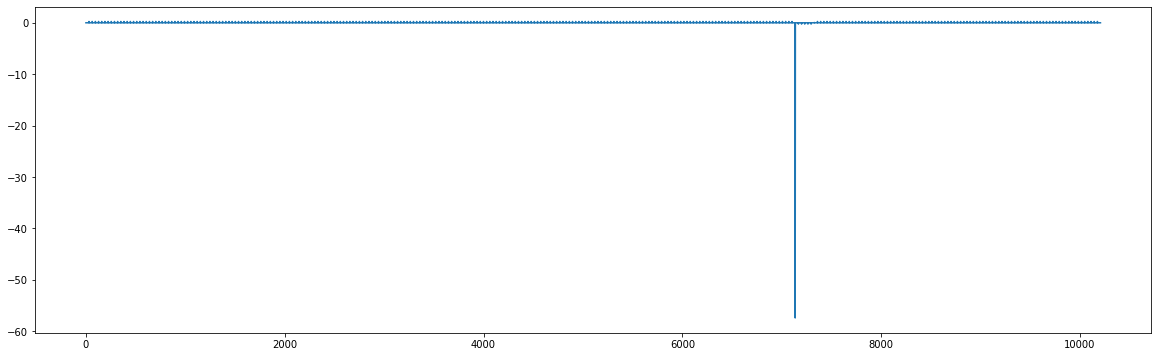

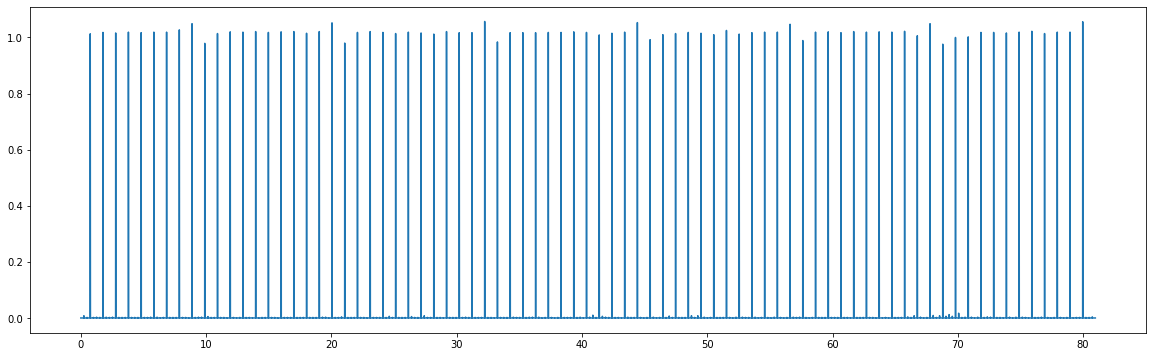

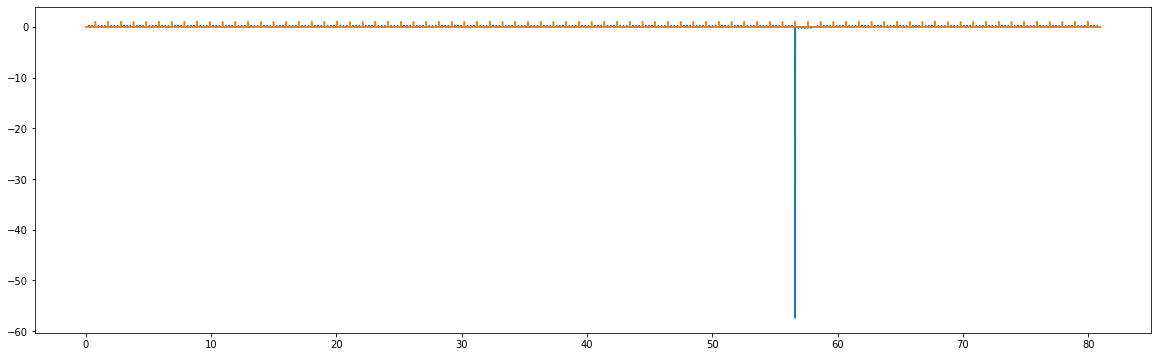

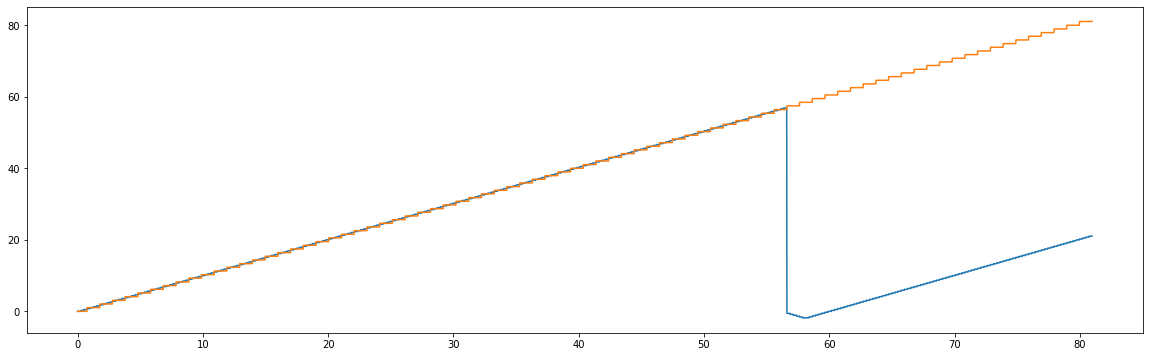

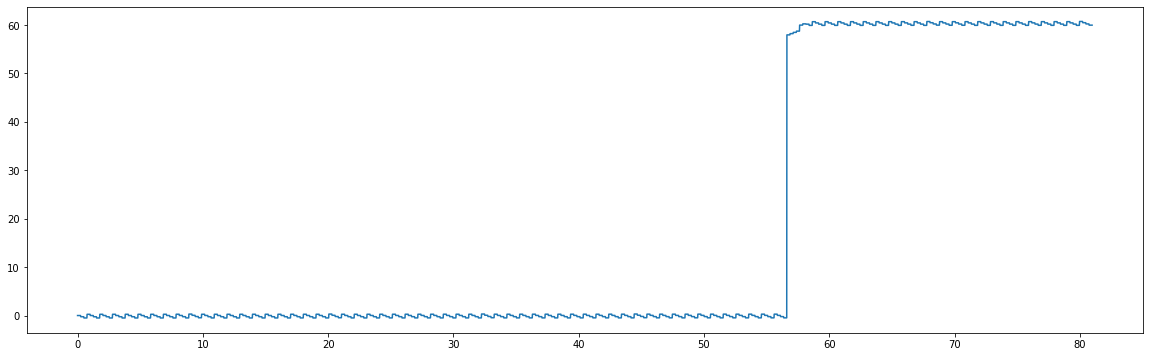

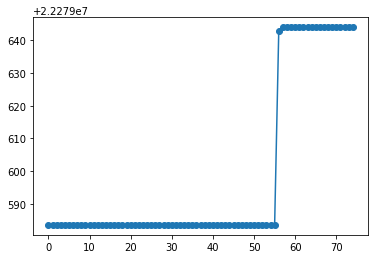

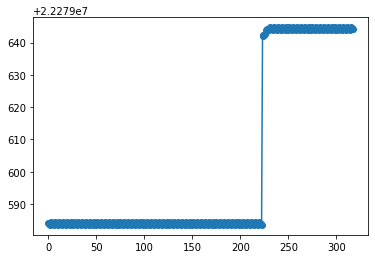

In [3]:
import matplotlib.pyplot as plt
import numpy as np

start = 0
res = len(diff_sys)

x_interval = sys_stamps[-1] - sys_stamps[0]
x_interval = np.linspace(0, x_interval, len(diff_sys))


plt.figure(figsize=(20,6))
mx_stamps = np.array(mx_stamps)
diff_mx = mx_stamps[1:] - mx_stamps[0:-1]
plt.plot(diff_mx[start:start+res])

plt.figure(figsize=(20,6))
sys_stamps = np.array(sys_stamps)
diff_sys = sys_stamps[1:] - sys_stamps[0:-1]
plt.plot(x_interval, diff_sys[start:start+res])

plt.figure(figsize=(20,6))
t = x_interval#np.linspace(0, res-1, res)
plt.plot(t, diff_mx[start:start+res], t, diff_sys[start:start+res])

plt.figure(figsize=(20,6))
mx_sum = np.cumsum(diff_mx)
sys_sum = np.cumsum(diff_sys)
plt.plot(t, mx_sum[start:start+res], t, sys_sum[start:start+res])

plt.figure(figsize=(20,6))
plt.plot(t,sys_sum[start:start+res] - mx_sum[start:start+res])

const_num = sys_stamps[0]
deltas = []
all_deltas = []
for i, stamp in enumerate(sys_stamps):
    if(stamp != const_num):
        const_num = stamp
        delta = sys_stamps[i-1] - mx_stamps[i-1]
        print(delta, sys_stamps[i-1], mx_stamps[i-1])
        if(sys_stamps[i] - sys_stamps[i-1] > 0.7):
            deltas.append(delta)
        
        all_deltas.append(delta)

plt.figure()      
plt.plot(deltas[0:75], "o-")
plt.figure()
plt.plot(all_deltas, "o-")

print(len(sys_stamps), len(mx_stamps))

In [4]:
delta_array = find_deltas(sys_stamps, mx_stamps)
sys_mx_time_delta = np.mean(delta_array)

print(sys_mx_time_delta)



22279601.119392417


In [5]:
mx_unrolled = unroll_stamps(mx_stamps)
print(mx_unrolled)
print(mx_stamps)


[1.61110722e+09 1.61110722e+09 1.61110722e+09 ... 1.61110724e+09
 1.61110724e+09 1.61110724e+09]
[1.61110722e+09 1.61110722e+09 1.61110722e+09 ... 1.61110724e+09
 1.61110724e+09 1.61110724e+09]


[1.63338682e+09 1.63338682e+09 1.63338682e+09 ... 1.63338684e+09
 1.63338684e+09 1.63338684e+09]


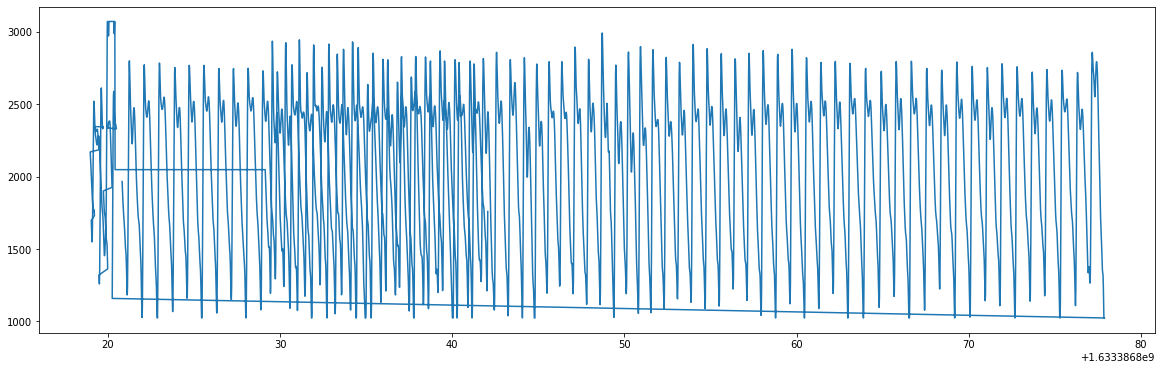

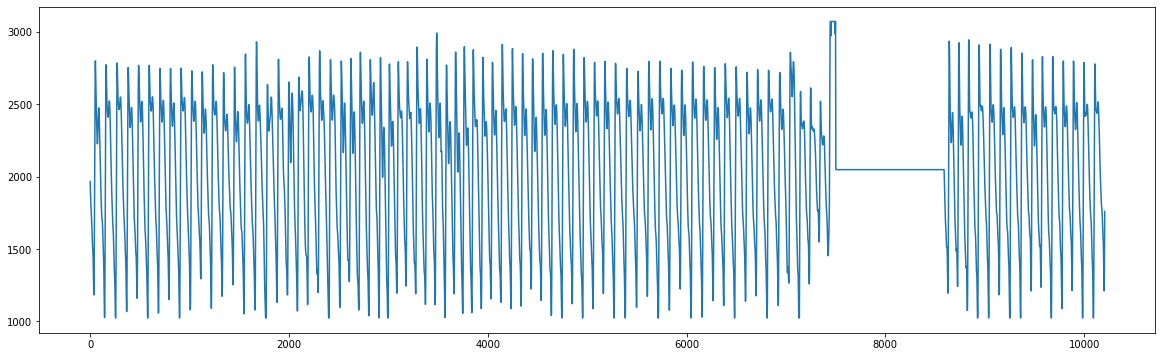

In [7]:
mx_local_system_stamps = apply_delta(mx_unrolled, sys_mx_time_delta)
print(mx_local_system_stamps)
plt.figure(figsize=(20,6))
plt.plot(mx_local_system_stamps, pleth)
plt.figure(figsize=(20,6))
plt.plot(pleth)